In [37]:
#import pyvista as pv
import serial
import serial.tools.list_ports
import time
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import threading

from scipy.signal import butter, filtfilt

Pacotes:
pip install pyvista
pip install trame
pip install ipywidgets
pip install pyserial


In [38]:
#3D Render do Objeto
# mesh = pv.read('xyzCube.stl')
# plotter = pv.Plotter()
# plotter.add_mesh(mesh)
# plotter.show()


In [39]:
#Leitura de dados da porta Serial
SERIAL_PORT = 'COM15'
BAUD_RATE = 115200

# Global variables for angles
acc_x = 0
acc_y = 0
acc_z = 0

gyro_x = 0
gyro_y = 0
gyro_z = 0

pitchAcc = 0
rollAcc = 0
yawAcc = 0

pitchGyro = 0
rollGyro = 0
yawGyro = 0

pitchAccVec, rollAccVec, yawAccVec = [], [], []
pitchGyroVec, rollGyroVec, yawGyroVec = [], [], []

auxpitchAccVec, auxrollAccVec, auxyawAccVec = [], [], []
auxpitchGyroVec, auxrollGyroVec, auxyawGyroVec = [], [], []
diff = []

num_samples = []

# Global variables for initial angles
zeropitchAcc = 0
zerorollAcc = 0
zeroyawAcc = 0
zeropitchGyro = 0
zerorollGyro = 0
zeroyawGyro = 0

In [40]:
#leitura da serial para leitura dos dados
def receive_angle_valuesloop():
    print("Receiving angle values from serial port...")
    global acc_x, acc_y, acc_z
    global gyro_x, gyro_y, gyro_z

    global pitchAcc, rollAcc, yawAcc
    global pitchGyro, rollGyro, yawGyro

    global pitchAccVec, rollAccVec, yawAccVec
    global pitchGyroVec, rollGyroVec, yawGyroVec

    global zeropitchAcc, zerorollAcc, zeroyawAcc
    global zeropitchGyro, zerorollGyro, zeroyawGyro

    global auxpitchAccVec, auxrollAccVec, auxyawAccVec
    global auxpitchGyroVec, auxrollGyroVec, auxyawGyroVec
    global num_samples
    global diff

    ser = serial.Serial(SERIAL_PORT, BAUD_RATE)

    while True:
        print(len(auxpitchAccVec))
        print(len(pitchAccVec))
        try:
        # Read accelerometer values from serial port
            line = ser.readline().decode().strip()
            #print(line)
            if line.startswith("X:"):
                sample_count = 0
                sample_count += 1
                num_samples.append(sample_count)
                #print("Accelerometer: ", line)
                values = line.split(' ')
                #print(values) 
                acc_x = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[0])))/100
                acc_y = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[1])))/100
                acc_z = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[2])))/100
                gyro_x = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[3])))/100
                gyro_y = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[4])))/100
                gyro_z = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[5])))/100
                pitchAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[6])))/100
                rollAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[7])))/100
                yawAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[8])))/100
                pitchGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[9])))/100
                rollGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[10])))/100
                yawGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[11])))/100


                if zeropitchAcc == 0: # se o valor inicial for 0, atribui o valor atual para setar o zero
                    # Create a Matplotlib figure and canvas
                    fig = plt.figure(figsize=(5, 5))
                    canvas = FigureCanvasTkAgg(fig, master=root)  # Use FigureCanvasTkAgg directly
                    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
                    zeropitchAcc = pitchAcc
                    zerorollAcc = rollAcc
                    zeroyawAcc = yawAcc
                    zeropitchGyro = pitchGyro
                    zerorollGyro = rollGyro
                    zeroyawGyro = yawGyro

                auxpitchAccVec.append(pitchAcc-zeropitchAcc) # subtrai o valor inicial
                auxrollAccVec.append(rollAcc-zerorollAcc)
                auxyawAccVec.append(yawAcc-zeroyawAcc)
                auxpitchGyroVec.append(pitchGyro-zeropitchGyro)
                auxrollGyroVec.append(rollGyro-zerorollGyro)
                auxyawGyroVec.append(yawGyro-zeroyawGyro)


                if len(auxpitchAccVec) == 10:
                    diff.append(np.mean(auxrollAccVec) - np.mean(auxrollGyroVec))
                    pitchAccVec.append(np.mean(auxpitchAccVec)) # calcula a média dos valores e  adiciona ao vetor
                    rollAccVec.append(np.mean(auxrollAccVec))
                    yawAccVec.append(np.mean(auxyawAccVec))
                    pitchGyroVec.append(np.mean(auxpitchGyroVec))
                    rollGyroVec.append(np.mean(auxrollGyroVec))
                    yawGyroVec.append(np.mean(auxyawGyroVec))
                    update_plot()
                    auxpitchAccVec, auxrollAccVec, auxyawAccVec = [], [], []
                    auxpitchGyroVec, auxrollGyroVec, auxyawGyroVec = [], [], []
                
        except:
            pass

    ser.close()

#leitura da serial para leitura dos dados
def receive_angle_values():
    print("Receiving angle values from serial port...")
    global acc_x, acc_y, acc_z
    global gyro_x, gyro_y, gyro_z

    global pitchAcc, rollAcc, yawAcc
    global pitchGyro, rollGyro, yawGyro

    global pitchAccVec, rollAccVec, yawAccVec
    global pitchGyroVec, rollGyroVec, yawGyroVec

    global zeropitchAcc, zerorollAcc, zeroyawAcc
    global zeropitchGyro, zerorollGyro, zeroyawGyro

    global auxpitchAccVec, auxrollAccVec, auxyawAccVec
    global auxpitchGyroVec, auxrollGyroVec, auxyawGyroVec
    global diff

    ser = serial.Serial(SERIAL_PORT, BAUD_RATE)

    while len(pitchAccVec) < 100:
        print(len(auxpitchAccVec))
        print(len(pitchAccVec))
        try:
            line = ser.readline().decode().strip()
            #print(line)
            if line.startswith("X:"):
                #print("Accelerometer: ", line)
                values = line.split(' ')
                #print(values) 
                acc_x = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[0])))/100
                acc_y = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[1])))/100
                acc_z = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[2])))/100
                gyro_x = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[3])))/100
                gyro_y = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[4])))/100
                gyro_z = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[5])))/100
                pitchAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[6])))/100
                rollAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[7])))/100
                yawAcc = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[8])))/100
                pitchGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[9])))/100
                rollGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[10])))/100
                yawGyro = float(''.join(filter(lambda x: x.isdigit() or x == '-', values[11])))/100


                if zeropitchAcc == 0: # se o valor inicial for 0, atribui o valor atual para setar o zero
                    zeropitchAcc = pitchAcc
                    zerorollAcc = rollAcc
                    zeroyawAcc = yawAcc
                    zeropitchGyro = pitchGyro
                    zerorollGyro = rollGyro
                    zeroyawGyro = yawGyro

                auxpitchAccVec.append(pitchAcc-zeropitchAcc) # subtrai o valor inicial
                auxrollAccVec.append(rollAcc-zerorollAcc)
                auxyawAccVec.append(yawAcc-zeroyawAcc)
                auxpitchGyroVec.append(pitchGyro-zeropitchGyro)
                auxrollGyroVec.append(rollGyro-zerorollGyro)
                auxyawGyroVec.append(yawGyro-zeroyawGyro)


                if len(auxpitchAccVec) == 10:
                    diff.append(np.mean(auxrollAccVec) - np.mean(auxrollGyroVec))
                    pitchAccVec.append(np.mean(auxpitchAccVec)) # calcula a média dos valores e  adiciona ao vetor
                    rollAccVec.append(np.mean(auxrollAccVec))
                    yawAccVec.append(np.mean(auxyawAccVec))
                    pitchGyroVec.append(np.mean(auxpitchGyroVec))
                    rollGyroVec.append(np.mean(auxrollGyroVec))
                    yawGyroVec.append(np.mean(auxyawGyroVec))
                    auxpitchAccVec, auxrollAccVec, auxyawAccVec = [], [], []
                    auxpitchGyroVec, auxrollGyroVec, auxyawGyroVec = [], [], []
                
        except:
            pass

    ser.close()

def update_plot():
    pitch_plot.clear()
    roll_plot.clear()

    # Plot the pitch and roll angles
    pitch_plot.plot(pitchGyroVec, label='Pitch', color='b')
    roll_plot.plot(rollGyroVec, label='Roll', color='r')

    # Set the y-axis limits to -180 and 180
    pitch_plot.set_ylim(-180, 180)
    roll_plot.set_ylim(-180, 180)

    # Set the axis labels and legend
    pitch_plot.set_xlabel('Time (samples)')
    pitch_plot.set_ylabel('Angle (degrees)')
    pitch_plot.legend(loc='upper right')

    roll_plot.set_xlabel('Time (samples)')
    roll_plot.set_ylabel('Angle (degrees)')
    roll_plot.legend(loc='upper right')

    canvas.draw()

Receiving angle values from serial port...
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
0
1
1
1
2
1
3
1
4
1
5
1
6
1
7
1
8
1
9
1
0
2
1
2
2
2
3
2
4
2
5
2
6
2
7
2
8
2
9
2
0
3
1
3
2
3
3
3
4
3
5
3
6
3
7
3
8
3
9
3
0
4
1
4
2
4
3
4
4
4
5
4
6
4
7
4
8
4
9
4
0
5
1
5
2
5
3
5
4
5
5
5
6
5
7
5
8
5
9
5
0
6
1
6
2
6
3
6
4
6
5
6
6
6
7
6
8
6
9
6
0
7
1
7
2
7
3
7
4
7
5
7
6
7
7
7
8
7
9
7
0
8
1
8
2
8
3
8
4
8
5
8
6
8
7
8
8
8
9
8
0
9
1
9
2
9
3
9
4
9
5
9
6
9
7
9
8
9
9
9
0
10
1
10
2
10
3
10
4
10
5
10
6
10
7
10
8
10
9
10
0
11
1
11
2
11
3
11
4
11
5
11
6
11
7
11
8
11
9
11
0
12
1
12
2
12
3
12
4
12
5
12
6
12
7
12
8
12
9
12
0
13
1
13
2
13
3
13
4
13
5
13
6
13
7
13
8
13
9
13
0
14
1
14
2
14
3
14
4
14
5
14
6
14
7
14
8
14
9
14
0
15
1
15
2
15
3
15
4
15
5
15
6
15
7
15
8
15
9
15
0
16
1
16
2
16
3
16
4
16
5
16
6
16
7
16
8
16
9
16
0
17
1
17
2
17
3
17
4
17
5
17
6
17
7
17
8
17
9
17
0
18
1
18
2
18
3
18
4
18
5
18
6
18
7
18
8
18
9
18
0
19
1
19
2
19
3
19
4
19
5
19
6
19
7
19
8
19
9
19
0
20
1
20
2
20
3
20
4
20
5
20
6
2

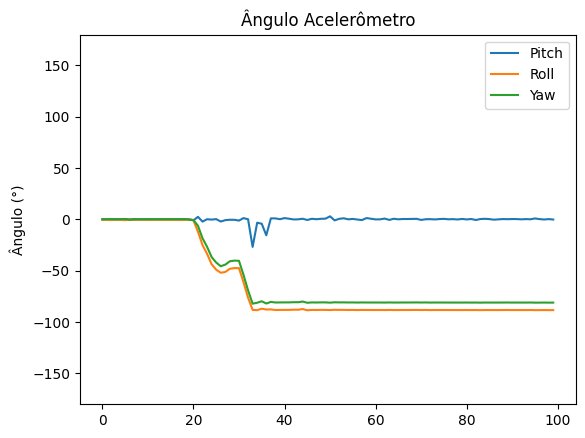

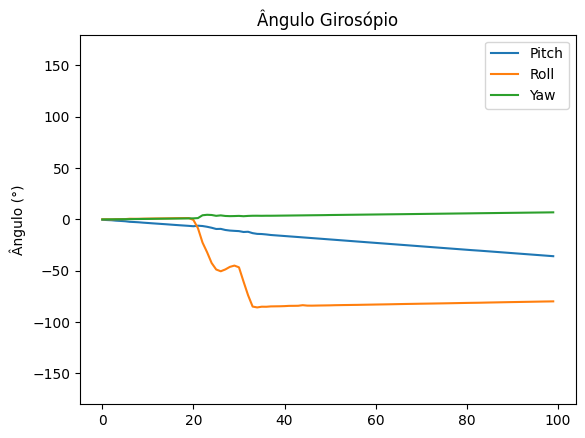

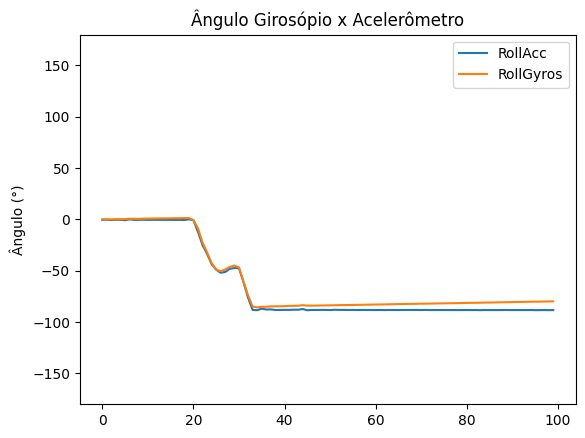

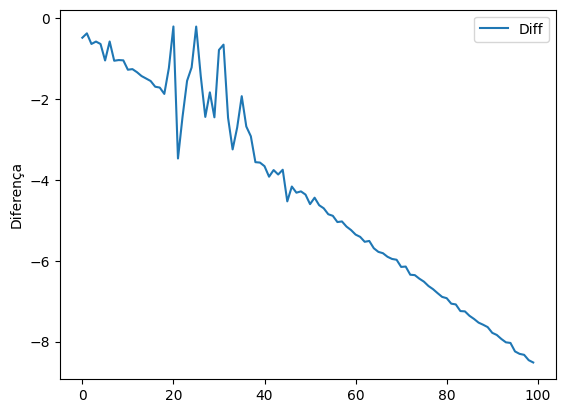

In [41]:
receive_angle_values()

cutoff_freq = 0.35  # Cutoff frequency in Hz
sample_rate = 21 # Sample rate in Hz
time = np.arange(len(pitchAccVec)) / sample_rate

plt.ylim(-180, 180)
plt.ylabel('Ângulo (°)')
plt.title('Ângulo Acelerômetro')
plt.plot(pitchAccVec, label='Pitch')
plt.plot(rollAccVec, label='Roll')
plt.plot(yawAccVec, label='Yaw')
plt.legend()
plt.show()

plt.ylim(-180, 180)
#title
plt.title('Ângulo Girosópio')
plt.ylabel('Ângulo (°)')
plt.plot(pitchGyroVec, label='Pitch')
plt.plot(rollGyroVec, label='Roll')
plt.plot(yawGyroVec, label='Yaw')
plt.legend()
plt.show()

plt.ylim(-180, 180)
#title
plt.title('Ângulo Girosópio x Acelerômetro')
plt.ylabel('Ângulo (°)')
plt.plot(rollAccVec, label='RollAcc')
plt.plot(rollGyroVec, label='RollGyros')
plt.legend()
plt.show()

#plot diff
plt.ylabel('Diferença')
plt.plot(diff, label='Diff')
plt.legend()
plt.show()
